In [22]:
# Implementar algoritmo de agrupación (por ejemplo, K-Means)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd 

In [23]:
df = pd.read_csv('data_videos/dataframes/data.csv' )
df.head(5)

,titulo_video,nombre_canal,keywords,lngs,bigrams,trigrams
0,AMT2 - Extracting Emails from your Gmail Inbox...,DigitalSreeni,"['amt2', 'extracting', 'emails', 'gmail', 'inb...",en,"[('amt2', 'extracting'), ('extracting', 'email...","[('amt2', 'extracting', 'emails'), ('extractin..."
1,Read emails with Python + Gmail API (part 1),ian samir,"['read', 'emails', 'python', 'gmail', 'api', '...",en,"[('read', 'emails'), ('emails', 'python'), ('p...","[('read', 'emails', 'python'), ('emails', 'pyt..."
2,Logra Más Con Menos Esfuerzo - Esencialismo de...,Mis Propias Finanzas,"['logra', 'menos', 'esfuerzo', 'esencialismo',...",es,"[('logra', 'menos'), ('menos', 'esfuerzo'), ('...","[('logra', 'menos', 'esfuerzo'), ('menos', 'es..."
3,Estratégia de trading con ChatGPT 4 Code Inter...,Rodrigo Prieto,"['estratégia', 'trading', 'chatgpt', '4', 'cod...",es,"[('estratégia', 'trading'), ('trading', 'chatg...","[('estratégia', 'trading', 'chatgpt'), ('tradi..."
4,AI & Machine Learning in Finance: AI Applicati...,Swedish House of Finance,"['ai', 'machine', 'learning', 'finance', 'ai',...",en,"[('ai', 'machine'), ('machine', 'learning'), (...","[('ai', 'machine', 'learning'), ('machine', 'l..."


In [24]:
df_all_keywords = df['keywords'].to_list()
df_all_keywords = [eval(item) for item in df_all_keywords]
# df_all_keywords = flatten_list(df_all_keywords)
# Unir todas las listas en una sola lista
clean_titles = [' '.join(sublist) for sublist in df_all_keywords]
clean_titles[:5]

['amt2 extracting emails gmail inbox using python',
 'read emails python gmail api part 1',
 'logra menos esfuerzo esencialismo greg mckeown',
 'estratégia trading chatgpt 4 code interpreter',
 'ai machine learning finance ai applications financial industry panel discussion']

In [25]:
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (1,3),
                                stop_words = "english"

                            )

In [26]:
vectors = vectorizer.fit_transform(clean_titles)

In [27]:
print (vectors[0])

  (0, 78)	0.5888887454301757
  (0, 95)	0.8082141087024366


In [28]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['10', '2022', '2023', '250', '3d', 'advanced', 'ai', 'api', 'app',
       'aprende', 'aprender', 'architecture', 'arduino', 'arm',
       'arquitectura', 'artificial', 'backend', 'beginners', 'best',
       'build', 'building', 'chatgpt', 'clase', 'clean', 'cloud', 'code',
       'computer', 'computer vision', 'control', 'course', 'curso',
       'data', 'data science', 'datos', 'deep', 'deep learning', 'delta',
       'delta robot', 'design', 'detection', 'docker', 'documental',
       'engineering', 'english', 'esp32', 'español', 'explained',
       'fastapi', 'funciona', 'google', 'hacer', 'industrial', 'inglés',
       'inteligencia', 'introducción', 'iot', 'learn', 'learning',
       'machine', 'machine learning', 'make', 'matlab', 'mejor',
       'microservices', 'microservicios', 'motion', 'motor', 'mundo',
       'notion', 'object', 'opencv', 'parte', 'paso', 'pi', 'plc',
       'programming', 'project', 'projects', 'python', 'rabbitmq',
       'raspberry', 'raspberry pi

In [29]:
dense = vectors.todense()
denselist = dense.tolist()


In [30]:
all_keywords = []
for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)

In [34]:
print ("Original Text:")
print (df.titulo_video[0]+"\n")

print ("Cleaned Text:")
print (clean_titles[0]+"\n")

print ("Only Keywords Text:")
print (all_keywords[0])

Original Text:
AMT2 - Extracting Emails from your Gmail Inbox using python

Cleaned Text:
amt2 extracting emails gmail inbox using python

Only Keywords Text:
['python', 'using']


## Kmeans Cluestering 

In [40]:
true_k = 5

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)
model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

In [41]:
i = 0
for cluster in order_centroids:
    print (f"Cluster {i}")
    for keyword in cluster[0:10]:
        print (terms[keyword])
    print ("")
    i=i+1

Cluster 0
robot
tutorial
data
course
10
fastapi
control
vs
inglés
learning

Cluster 1
curso
industrial
python
clase
paso
introducción
2022
robots
docker
raspberry pi

Cluster 2
python
tutorial
using
opencv
fastapi
data
web
api
course
code

Cluster 3
backend
engineering
building
web
2022
ser
rabbitmq
projects
react
app

Cluster 4
parte
curso
documental
tutorial
python
iot
notion
control
arquitectura
microservicios



## Ploting 

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [43]:
kmean_indices = model.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())
colors = ["r", "b", "m", "y", "c"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

In [39]:
kmean_indices.shape

(3100,)

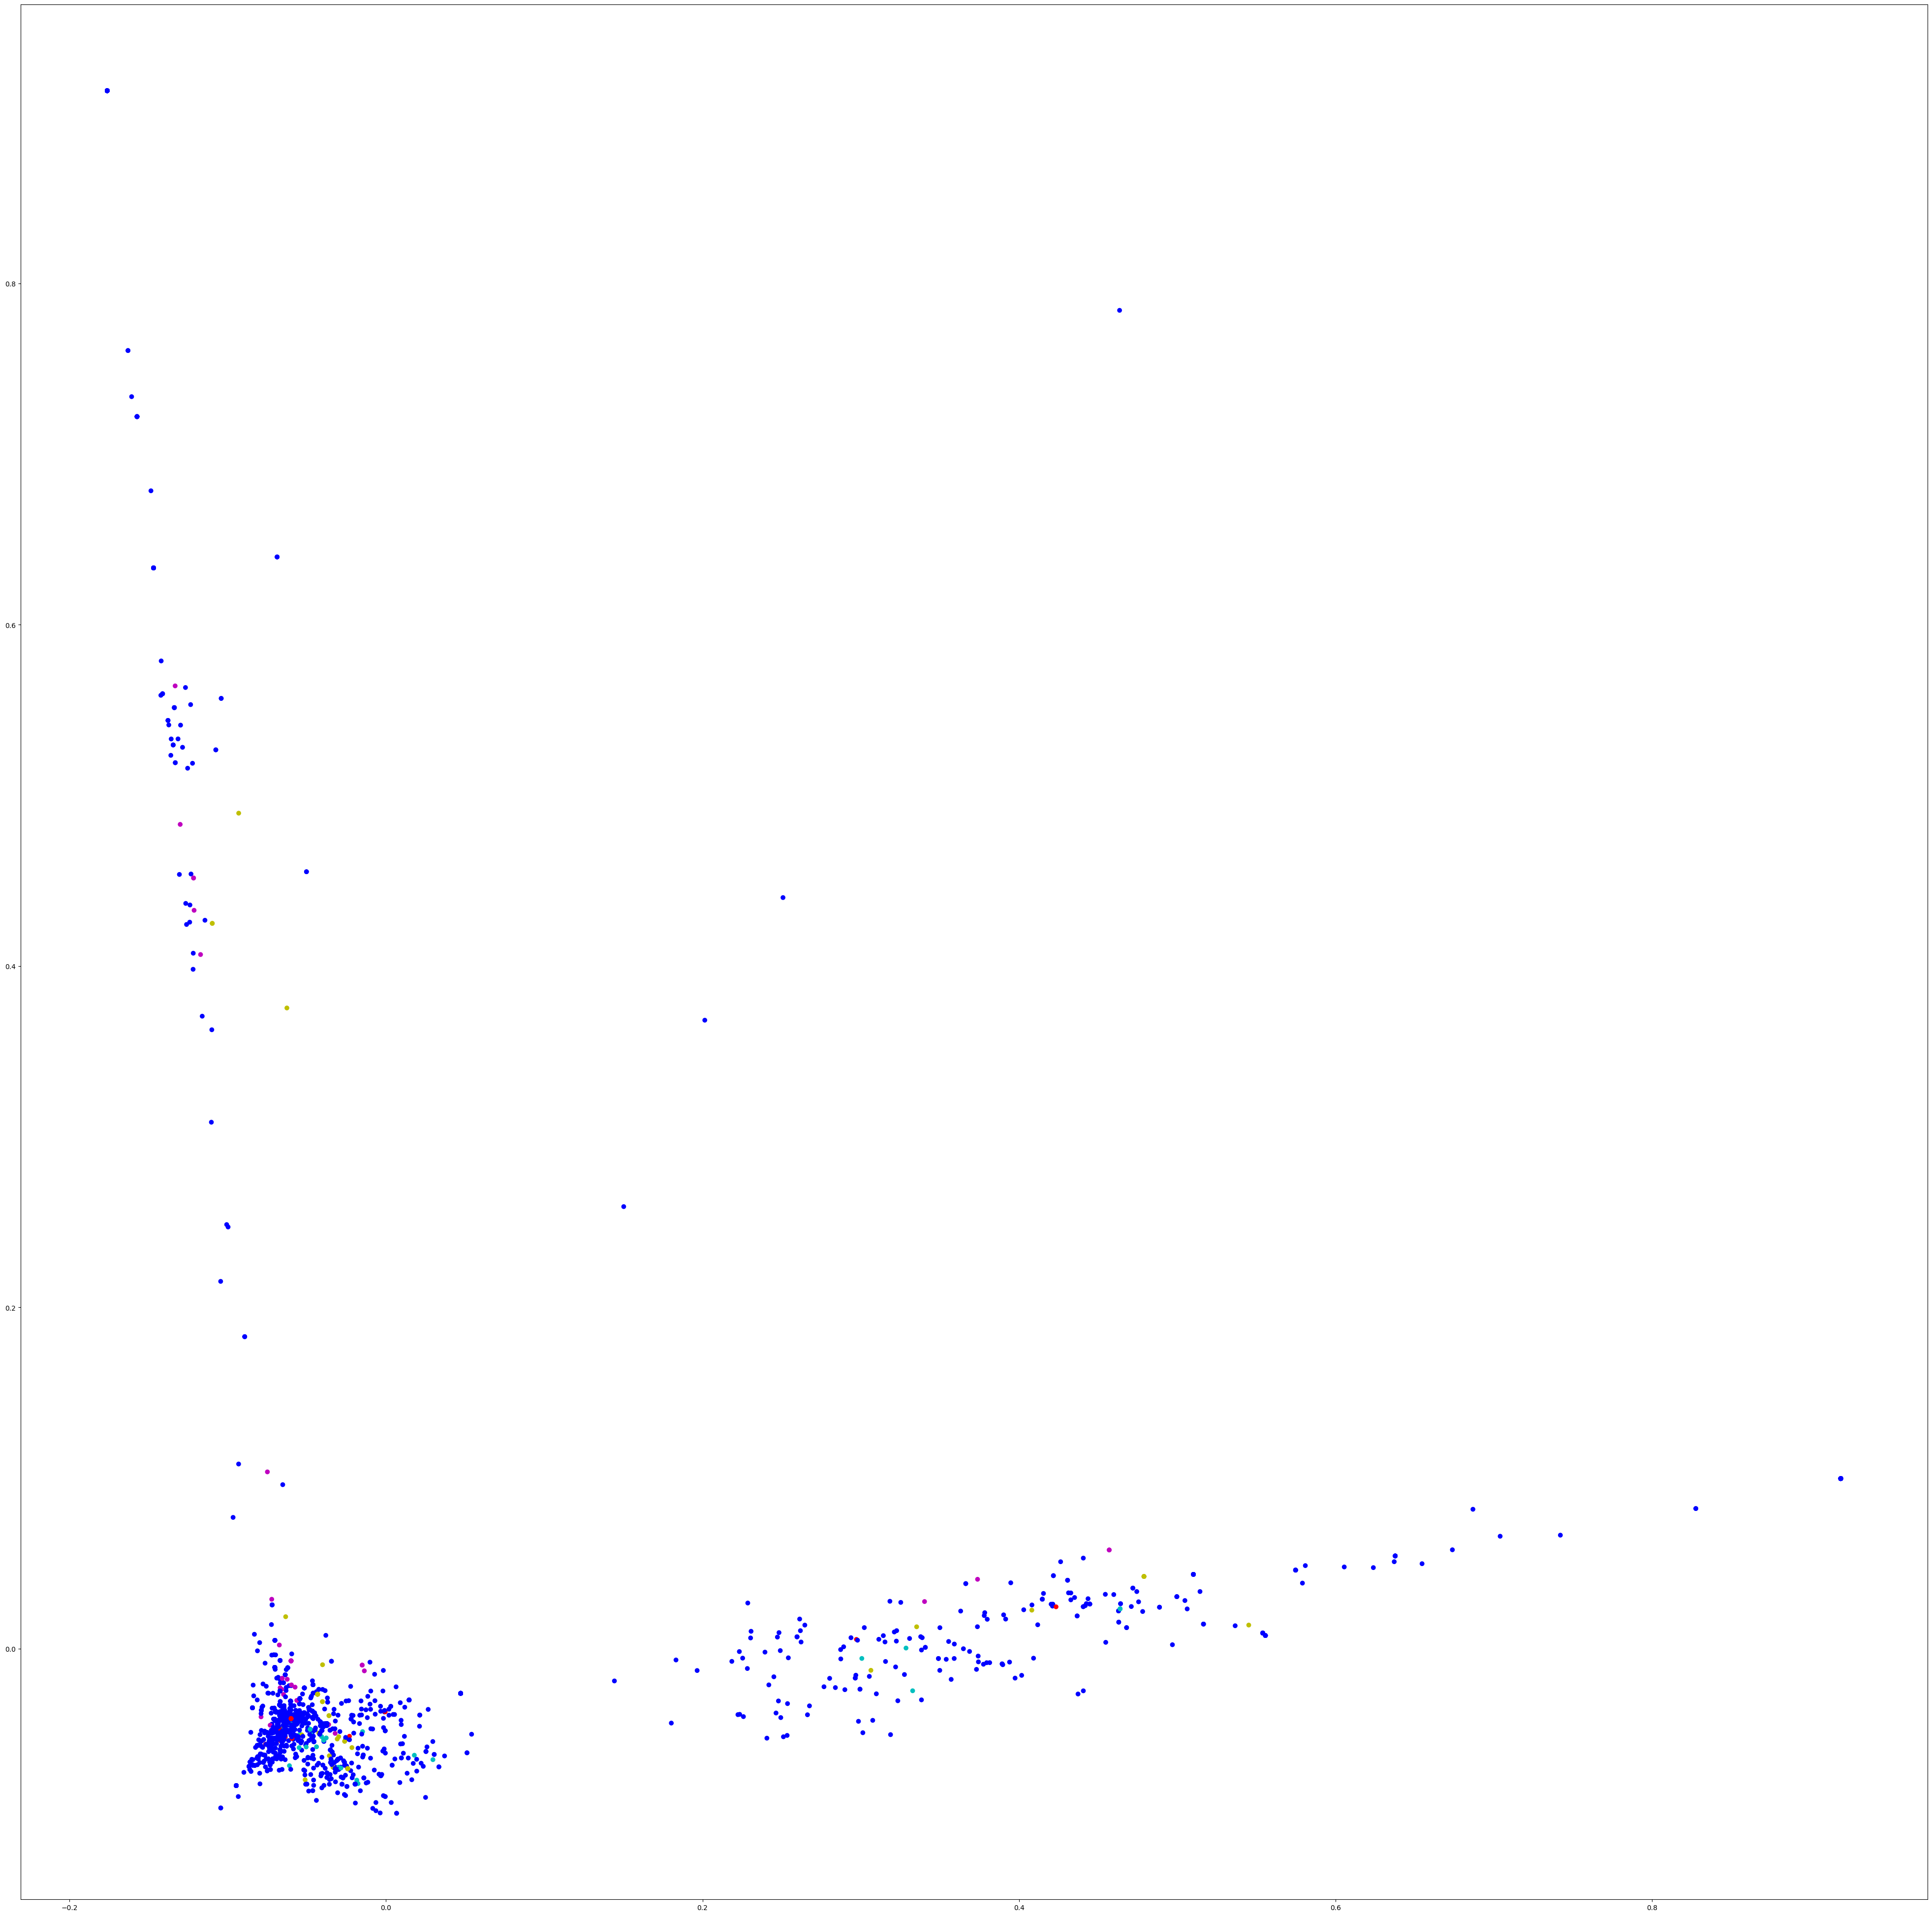

In [44]:
fig, ax = plt.subplots(figsize=(50, 50))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 119916 (\N{MATHEMATICAL BOLD ITALIC CAPITAL E}) missing from current font.
  func(*args, **kwargs)
c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 119935 (\N{MATHEMATICAL BOLD ITALIC CAPITAL X}) missing from current font.
  func(*args, **kwargs)
c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 119927 (\N{MATHEMATICAL BOLD ITALIC CAPITAL P}) missing from current font.
  func(*args, **kwargs)
c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 119923 (\N{MATHEMATICAL BOLD ITALIC CAPITAL L}) missing from current font.
  func(*args, **kwargs)
c:\Users\Usuario\Documents\Jhonier\proyectos_personales\Scra

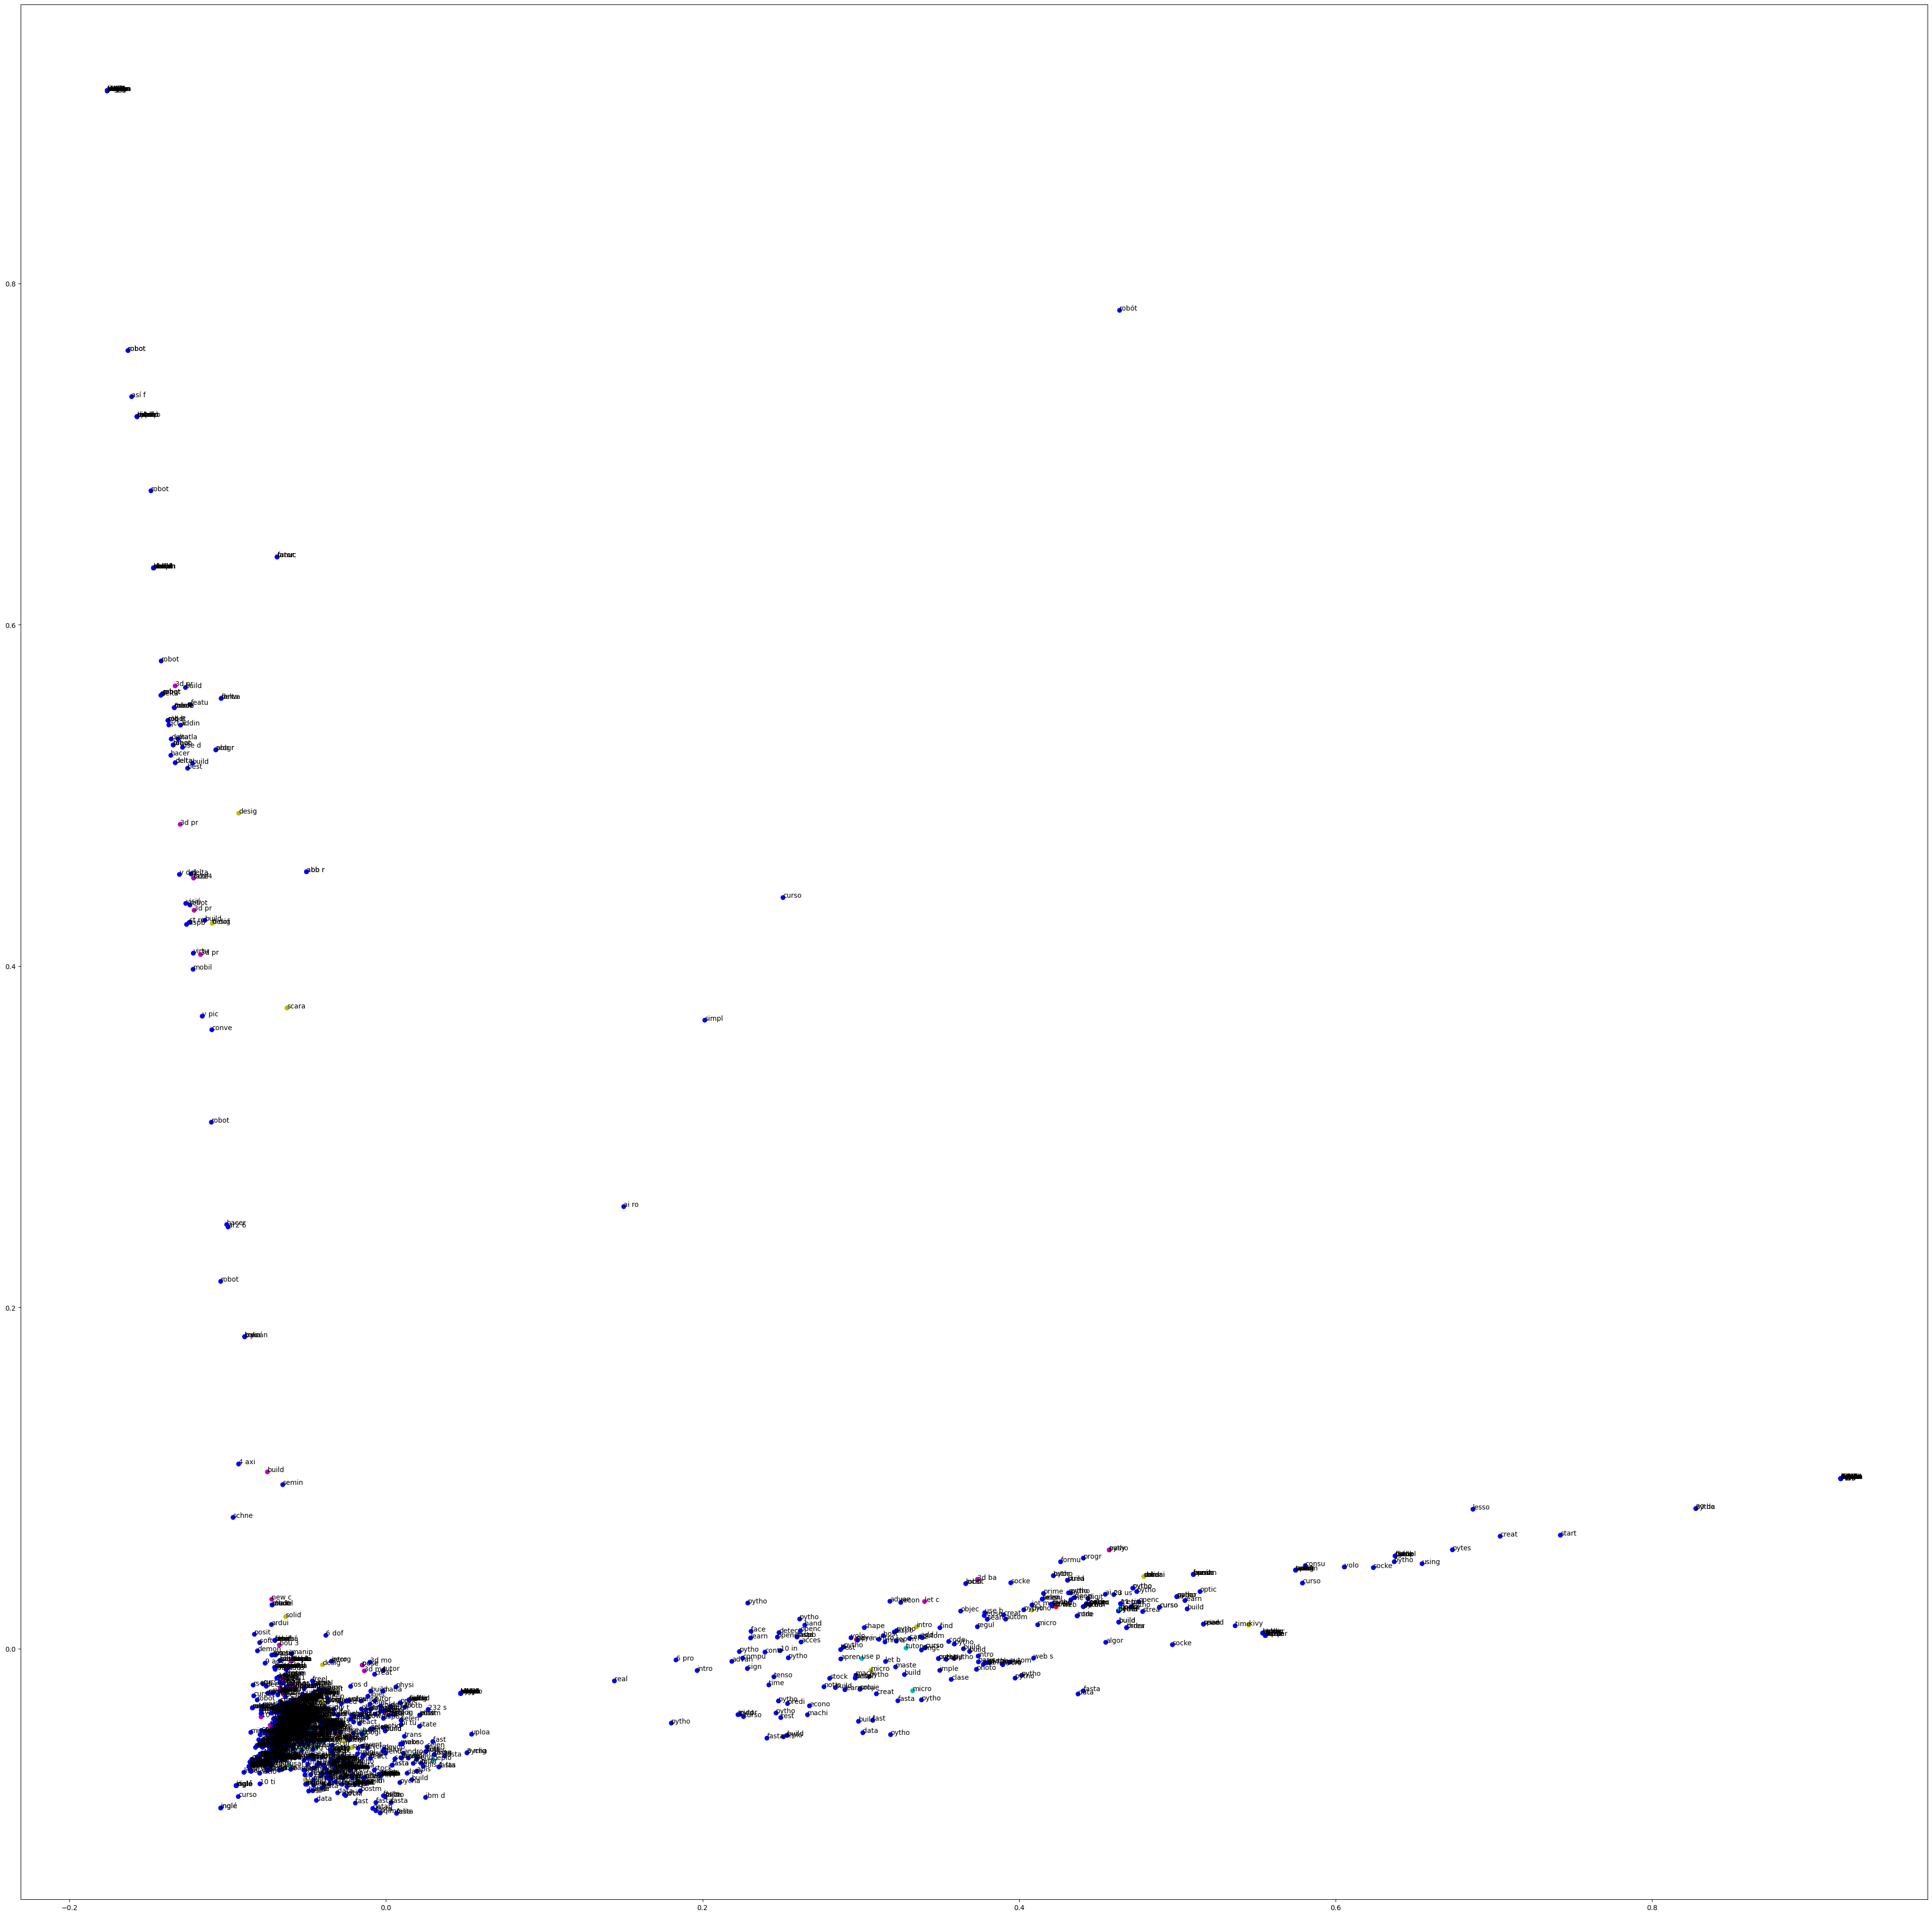

In [45]:
fig, ax = plt.subplots(figsize=(50, 50))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])
for i, txt in enumerate(clean_titles):
    ax.annotate(txt[0:5], (x_axis[i], y_axis[i]))

# LDA 

In [46]:
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [47]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(clean_titles)
print (lemmatized_texts[0][0:90])

amt2 extract email gmail inbox use python


In [48]:

def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['amt', 'extract', 'email', 'gmail', 'inbox', 'use', 'python']


In [49]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]
amt


In [50]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [51]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis


c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
16    -0.254629  0.103457       1        1  9.362274
11     0.133376 -0.298166       2        1  8.381710
15     0.223061  0.049816       3        1  6.992294
13     0.146134  0.236096       4        1  6.539063
22     0.079177 -0.050522       5        1  5.854834
18    -0.053580 -0.185365       6        1  5.403387
0     -0.036864  0.124179       7        1  5.237496
10     0.111899  0.070605       8        1  4.987135
20    -0.109684 -0.072934       9        1  4.854579
24    -0.154692 -0.016337      10        1  3.960490
4     -0.093069  0.122832      11        1  3.891431
6     -0.020818 -0.097468      12        1  3.465847
21    -0.062844 -0.076261      13        1  3.116847
25     0.137117 -0.003092      14        1  2.880164
12     0.023201  0.137502      15        1  2.784229
23     0.107290 -0.084965      16        1  2.776470
27     0.040379 -0.046757      17        1  2.061859
9     -0.084128  0.047443      18        1  1.979058
3     -0.100092 -0.015629      19        1  1.935390
2      0.001773  0.055334      20        1  1.822220
28     0.028877  0.037658      21        1  1.813717
19    -0.010538  0.011662      22        1  1.803685
8     -0.023078  0.024276      23        1  1.672251
17     0.011170 -0.067407      24        1  1.227662
5     -0.002059  0.002732      25        1  1.153576
7     -0.019791 -0.012905      26        1  1.014556
26    -0.002365 -0.000769      27        1  0.855571
14    -0.006376  0.001246      28        1  0.833593
1     -0.004420  0.001868      29        1  0.669306
29    -0.004425  0.001871      30        1  0.669306, topic_info=         Term       Freq       Total Category  logprob  loglift
21      learn  249.00000  249.000000  Default  30.0000  30.0000
62   tutorial  254.00000  254.000000  Default  29.0000  29.0000
6         use  214.00000  214.000000  Default  28.0000  28.0000
79    robotic  166.00000  166.000000  Default  27.0000  27.0000
5      python  149.00000  149.000000  Default  26.0000  26.0000
..        ...        ...         ...      ...      ...      ...
25      array    0.02152    2.036453  Topic30  -8.0812   0.4567
26     camera    0.02152   63.775433  Topic30  -8.0812  -2.9875
27      image    0.02152   11.463868  Topic30  -8.0812  -1.2713
28         pi    0.02152    2.036453  Topic30  -8.0812   0.4567
29  raspberry    0.02152  128.626164  Topic30  -8.0812  -3.6890

[1238 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
60        1  0.810405      advance
16        2  0.974514           ai
7         9  0.933250          api
162      16  0.965505          app
17        2  0.924692  application
...     ...       ...          ...
259       7  0.924227          web
38       14  0.662130      webinar
182       1  0.844049      website
160      21  0.726840    websocket
253      14  0.693257         well

[128 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 12, 16, 14, 23, 19, 1, 11, 21, 25, 5, 7, 22, 26, 13, 24, 28, 10, 4, 3, 29, 20, 9, 18, 6, 8, 27, 15, 2, 30])

with spacy 

In [33]:
'''
import spacy

# Cargar modelo de lenguaje spaCy
# es_core_news_lg
# en_core_web_sm
nlp = spacy.load("en_core_web_lg")

# Crear un knowledge graph
knowledge_graph = {}

for index, row in df.iterrows():
    doc = nlp(row['titulo_video'])
    keywords = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    for keyword in keywords:
        if keyword not in knowledge_graph:
            knowledge_graph[keyword] = set()
        knowledge_graph[keyword].add(row['titulo_video'])

# Imprimir el knowledge graph
for keyword, related_videos in knowledge_graph.items():
    print(f"{keyword}: {related_videos}")
    '''

'\nimport spacy\n\n# Cargar modelo de lenguaje spaCy\n# es_core_news_lg\n# en_core_web_sm\nnlp = spacy.load("en_core_web_lg")\n\n# Crear un knowledge graph\nknowledge_graph = {}\n\nfor index, row in df.iterrows():\n    doc = nlp(row[\'titulo_video\'])\n    keywords = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]\n    for keyword in keywords:\n        if keyword not in knowledge_graph:\n            knowledge_graph[keyword] = set()\n        knowledge_graph[keyword].add(row[\'titulo_video\'])\n\n# Imprimir el knowledge graph\nfor keyword, related_videos in knowledge_graph.items():\n    print(f"{keyword}: {related_videos}")\n    '